# DATA EXPLORATION - Advanced study of epigenetic mechanisms in the development of neoplasms 

In this notebook, the goal is to **gain an initial understanding of the medical and biological concepts** by **exploring the data** in its raw form, allowing me to examine its structure and fundamental characteristics.


### Libraries


In [2]:
# Capire quali librerie sono utili ora come ora
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

## Overview of the problem
**Cancer is a group of more than 100 diseases characterized by the uncontrolled division of cells in the body.** These diseases can develop in nearly every tissue and share common biological processes. Cancer begins when a single cell loses the normal controls that regulate its division and starts to divide uncontrollably. The resulting daughter cells continue to proliferate abnormally, forming a mass of cells known as a tumor. A tumor may remain confined to its original tissue (in situ cancer) or invade surrounding tissues (invasive cancer). When a tumor is invasive, it is considered malignant and can spread to other parts of the body through the bloodstream or lymphatic system, forming metastases.

**Cancer becomes life-threatening when its growth disrupts vital tissues and organs necessary for survival.** Understanding of cancer has greatly advanced due to progress in molecular biology, which has enabled researchers to analyze individual cell characteristics and identify genes and molecules involved in cancer development. This knowledge has led to the development of new strategies for preventing, diagnosing, and treating cancer.

(Source: National Institutes of Health (NIH); Biological Sciences Curriculum Study. NIH Curriculum Supplement Series. Available at: [NIH - Understanding Cancer](https://www.ncbi.nlm.nih.gov/books/NBK20362/?report=printable))

A **neoplasia** is an abnormal and uncontrolled growth of cells, which forms a mass or lump known as a **tumor**. It can occur in any tissue or organ in the body. The term "neoplasia" itself comes from the Greek words **"neo-"** (new) and **"-plasis"** (formation), referring to the formation of new, abnormal cells.

Neoplasms can be classified into two broad categories:

1. **Benign neoplasms**: These are non-cancerous growths. While they can grow and cause problems depending on their size or location, they generally do not spread to other parts of the body. Examples include **fibroids** and **adenomas**.

2. **Malignant neoplasms**: These are cancerous growths that have the potential to invade surrounding tissues and spread (metastasize) to other parts of the body. Malignant neoplasms are commonly referred to as **cancers**. Examples include **breast cancer**, **lung cancer**, and **colon cancer**.

The growth of a neoplasm is often driven by genetic mutations in the cells that disrupt normal regulation of cell division, causing the cells to proliferate uncontrollably.

(The Hallmarks of Cancer - Hanahan, Weinberg )

**Breast cancer is the most commonly diagnosed cancer in women and the second most common cause of cancer-related death among women worldwide.** The breasts are paired glands situated superficially to the pectoralis major muscle, containing milk-producing cells arranged in lobules. These lobules aggregate into lobes interspersed with fat. Milk and other secretions are produced in acini and are extruded through lactiferous ducts that exit at the nipple. Breasts are anchored to the underlying muscular fascia by Cooper ligaments, which provide structural support. Breast cancer most commonly originates in the ductal epithelium (ductal carcinoma) but can also develop in the breast lobules (lobular carcinoma). Risk factors for breast cancer include age, gender, personal and family history of breast cancer, histologic abnormalities, reproductive history, and exogenous hormone use. The incidence of breast cancer increases with advancing age, and most cases occur in women. A history of cancer in one breast increases the likelihood of a second primary cancer in the contralateral breast. Genetic factors account for 5% to 10% of all breast cancer cases, with BRCA1 and BRCA2 being the most important genes responsible for increased breast cancer susceptibility. Reproductive milestones that increase a woman’s lifetime estrogen exposure, such as early onset of menarche, late age at first live childbirth, nulliparity, and late menopause, are thought to increase breast cancer risk. Exogenous hormone use, including therapeutic or supplemental estrogen and progesterone, also increases breast cancer risk. Breast cancer is diagnosed through physical examination, breast imaging, and tissue biopsy. Treatment options include surgery, chemotherapy, radiation, hormonal therapy, and, more recently, immunotherapy. Factors such as histology, stage, tumor markers, and genetic abnormalities guide individualized treatment decisions.

(Source: Menon G, Alkabban FM, Ferguson T. Breast Cancer. [Updated 2024 Feb 25]. In: StatPearls [Internet]. Treasure Island (FL): StatPearls Publishing; 2025 Jan-. Available from: [NIH - Breast Cancer](https://www.ncbi.nlm.nih.gov/books/NBK482286/?utm_source=chatgpt.com))

**What is a CpG site?** -> The CpG Landscape of Protein Coding DNA in Vertebrates - Wilcox, Ord, Kappei, Gossmann

A CpG site refers to a region of DNA where a cytosine (C) is followed by a guanine (G) nucleotide, connected by a phosphodiester bond. The "CpG" notation specifically refers to the DNA sequence 5'-C—G-3', where p indicates the phosphodiester bond between the cytosine and guanine.

These CpG sites are particularly important in the context of DNA methylation, which is a common epigenetic modification. DNA methylation typically occurs at the 5' position of the cytosine in CpG dinucleotides, converting it into 5-methylcytosine. This modification plays a critical role in regulating gene expression, silencing genes, and maintaining genomic stability. High-density regions of CpG sites are often referred to as CpG islands, which are commonly found in promoter regions of genes, where they influence gene activity.

In cancer, the methylation patterns of CpG sites are often disrupted. Hypermethylation of CpG sites in promoter regions of tumor suppressor genes can lead to their silencing, contributing to cancer progression. On the other hand, hypomethylation of CpG sites in other regions may lead to the activation of oncogenes.


**DNA Methylation: A Key Epigenetic Mechanism** -> DNA methylation patterns and epigenetic memory - Adrian Bird

DNA methylation is a fundamental epigenetic modification involving the addition of a methyl group to the 5' position of cytosine residues, predominantly within CpG dinucleotides. This modification plays a pivotal role in regulating gene expression, maintaining genome stability, and establishing cellular identity. In the context of gene regulation, methylation typically occurs in gene promoter regions, where it can inhibit the binding of transcription factors and other regulatory proteins, thereby silencing gene expression. Conversely, the absence of methylation in these regions is often associated with active gene expression. Methylation patterns are heritable during cell division, contributing to epigenetic memory and the maintenance of cell-specific gene expression profiles across generations. These patterns are dynamically established during development and can be influenced by environmental factors, underscoring the complex interplay between genetics and epigenetics in shaping cellular function and organismal development.

**Cancer** is a group of more than 100 diseases characterized by the **uncontrolled division of cells** within the body. These diseases can develop in almost every tissue and share common biological processes. Cancer begins when a single cell loses the normal controls that regulate its division, causing it to divide uncontrollably. This leads to the formation of a mass of cells known as a **tumor**. Tumors can be classified as **benign** or **malignant**. **Benign neoplasms** are non-cancerous growths that generally do not spread to other parts of the body, although they can cause problems depending on their size or location. Examples include **fibroids** and **adenomas**. **Malignant neoplasms**, on the other hand, are cancerous growths that have the ability to invade surrounding tissues and metastasize to other parts of the body via the bloodstream or lymphatic system. When a tumor is invasive, it is considered malignant, and it can form metastases in distant organs. The growth of both benign and malignant neoplasms is often driven by genetic mutations that disrupt normal cell division, causing cells to proliferate uncontrollably (Hanahan and Weinberg, 2000).

**Breast cancer** is the most commonly diagnosed cancer in women and the second most common cause of cancer-related death among women worldwide. The breasts are paired glands located superficially to the pectoralis major muscle, containing milk-producing cells organized into lobules, which aggregate into lobes interspersed with fat. Milk is produced in the acini and is transported through lactiferous ducts that exit at the nipple. The breast is anchored to the underlying fascia by Cooper ligaments, providing structural support. Most breast cancers originate in the ductal epithelium (ductal carcinoma), though they can also develop in the lobules (lobular carcinoma). Risk factors for breast cancer include **age**, **gender**, **personal and family history**, **histologic abnormalities**, **reproductive history**, and **exogenous hormone use**. The incidence of breast cancer increases with age, and most cases occur in women. A history of breast cancer in one breast raises the likelihood of a second primary cancer in the opposite breast. Genetic mutations, such as those in the **BRCA1** and **BRCA2** genes, account for 5% to 10% of breast cancer cases, significantly increasing the risk of the disease. Reproductive factors that increase lifetime exposure to estrogen, such as early menarche, late childbirth, nulliparity, and late menopause, have been associated with higher breast cancer risk. Additionally, **exogenous hormone use**—including therapeutic or supplemental estrogen and progesterone—has been linked to an elevated risk. Breast cancer is typically diagnosed through physical examination, imaging, and biopsy, and treatment options include surgery, chemotherapy, radiation, hormonal therapy, and increasingly, immunotherapy. Factors such as histology, stage, tumor markers, and genetic abnormalities guide personalized treatment decisions (Menon, Alkabban, Ferguson, 2024).

An essential aspect of cancer biology is the role of **DNA methylation**, a key **epigenetic mechanism** that regulates gene expression. **DNA methylation** occurs when a methyl group is added to the 5' position of cytosine residues, typically within **CpG dinucleotides**. The notation **CpG** refers to the sequence 5'-C—G-3', where "p" indicates the phosphodiester bond between cytosine and guanine. CpG sites are often located in **CpG islands**, regions with high densities of CpG sites, typically found in the promoter regions of genes. DNA methylation can **silence genes** by inhibiting the binding of transcription factors and other regulatory proteins. Conversely, the absence of methylation is often associated with gene activation. These methylation patterns are critical in regulating gene expression, maintaining genomic stability, and contributing to cellular identity (Bird, 2007).

In the context of cancer, **methylation patterns** in CpG sites are frequently disrupted. **Hypermethylation** of CpG sites in the promoter regions of tumor suppressor genes can lead to their silencing, allowing for the unchecked growth of cells. On the other hand, **hypomethylation** in other regions may activate oncogenes, contributing to cancer progression. Changes in DNA methylation have been associated with various types of cancer, including breast cancer, where methylation in certain genes, such as those involved in DNA repair or tumor suppression, can facilitate malignant transformation (Wilcox, Ord, Kappei, Gossmann, 2018).

In summary, the study of **neoplasia**, particularly the genetic and epigenetic changes involved in cancer progression, is crucial for improving our understanding of how cancer develops and progresses. The disruption of normal cell regulation due to genetic mutations and abnormal DNA methylation patterns in CpG sites plays a central role in the formation of malignant tumors. With this knowledge, we can better diagnose, treat, and ultimately prevent various types of cancer, including breast cancer, by focusing on these underlying molecular mechanisms.



## Dataset

### Dataset information
The **GSE69914** dataset, available from the **Gene Expression Omnibus (GEO)** database, contains **DNA methylation profiling** data obtained from the **Illumina Infinium 450k Human Methylation Beadchip**. The dataset includes methylation profiles of approximately **480,000 CpG sites** across **407 samples** from various tissue types. These samples include **50 normal breast tissues**, **42 matched normal-adjacent breast cancer pairs (84 samples)**, **263 unmatched breast cancer samples**, and **7 normal samples from BRCA1 carriers** alongside **4 BRCA1 breast cancer samples**.

The experiment involved **bisulfite-converted DNA** that was hybridized to the Illumina platform, enabling the profiling of DNA methylation patterns associated with normal and cancerous breast tissues. The dataset provides insights into the **epigenetic landscape** of **ER-positive breast cancer**, with a focus on **field defects** and how DNA methylation alterations can serve as potential biomarkers for cancer progression.

Key details:

* **Experiment type**: Methylation profiling by genome tiling array.
* **Organism**: Homo sapiens (Human).
* **Contributor(s)**: Teschendorff A, Widschwendter M.
* **Platform**: Illumina HumanMethylation450 BeadChip.

**Dataset link**: [GSE69914 on GEO](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=gse69914)

**Status**: Public as of Jun 18, 2015

This dataset is invaluable for studying the role of **DNA methylation** in breast cancer and normal tissues, offering a comprehensive resource for research in **epigenomics** and **oncology**.

The **GSE69914** dataset includes several types of breast tissue samples, such as **normal tissues**, **normal-adjacent tissues**, and **breast cancer samples**, each serving a different purpose in understanding the genetic and epigenetic landscape of breast cancer. **Normal tissues** are collected from individuals without breast cancer, typically used as baseline controls for comparison with tumor samples. **Normal-adjacent tissues** are taken from areas adjacent to the tumor within the same patient. These tissues are often assumed to reflect early, subtle epigenetic changes caused by the tumor microenvironment, even before the development of cancer. On the other hand, **breast cancer samples** can be categorized into **unmatched** and **matched** types. **Unmatched cancer samples** are tumor tissues collected without corresponding normal tissue from the same individual, while **matched cancer samples** come from patients where both normal and tumor tissues are collected for comparison, which allows researchers to identify specific epigenetic changes associated with tumor development. The dataset also includes **BRCA1-related samples**, from patients who carry mutations in the **BRCA1 gene**. The **BRCA1 gene** is a tumor suppressor gene, and mutations in it significantly increase the risk of developing breast cancer and ovarian cancer. These samples provide valuable insights into the epigenetic alterations in individuals with inherited cancer susceptibility.

The diversity of tissue samples in this dataset allows for a comprehensive analysis of DNA methylation profiles, particularly in the context of cancer progression, the tumor microenvironment, and genetic predispositions such as BRCA1 mutations (Source: **National Institutes of Health** [NIH](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=gse69914), **StatPearls**).


Now let's import the **dataset** downloaded from the **GEO (Gene Expression Omnibus)** database [GSE69914](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=gse69914), available in *Series Matrix File (.txt)* format. The file has been converted to a *CSV* format without any other modifications and uploaded to **Kaggle** for easier access and use within this notebook.

In [ ]:
# Find dataset's path 
file_path = '/kaggle/input/raw-dataset/GSE69914_series_matrix.csv'  # file's path
raw_dataset = pd.read_csv(file_path)

In [3]:
# View the first few rows of the dataset
raw_dataset.head()

,ID_REF,GSM1712367,GSM1712368,GSM1712369,GSM1712370,GSM1712371,GSM1712372,GSM1712373,GSM1712374,GSM1712375,...,GSM1712770,GSM1712771,GSM1712772,GSM1712773,GSM1712774,GSM1712775,GSM1712776,GSM1712777,GSM1712778,GSM1712779
0,cg00000029,0.258254,0.197553,0.275187,0.150849,0.240538,0.249905,0.378757,0.474699,0.363260,...,0.273695,0.204416,0.250100,0.117792,0.079539,0.242573,0.117149,0.201398,0.216148,0.569178
1,cg00000108,0.986116,0.981426,0.972137,0.984434,0.987393,0.958457,0.984781,0.988312,0.971297,...,0.978810,0.955072,0.972645,0.971132,0.982360,0.973398,0.926971,0.974608,0.976362,0.984590
2,cg00000109,0.889916,0.826830,0.839431,0.950852,0.897285,0.814509,0.898999,0.903172,0.920438,...,0.844270,0.878550,0.852844,0.895050,0.930519,0.900096,0.625678,0.810017,0.889987,0.919995
3,cg00000165,0.247964,0.343906,0.216030,0.576088,0.616293,0.238897,0.243838,0.460061,0.429162,...,0.224468,0.303041,0.237599,0.273763,0.903569,0.367987,0.380380,0.246235,0.410192,0.282906
4,cg00000236,0.902621,0.868874,0.837979,0.931236,0.915173,0.827905,0.905214,0.918090,0.886167,...,0.929749,0.932601,0.860249,0.937596,0.939224,0.930300,0.784228,0.908534,0.911480,0.923068


#### Dataset description
Based on the description of the dataset in *Epigenetic Mechanisms in the Development of Neoplasms (Nastaran Ahmadi Bonakdar's thesis)* and the *GSE69914 study*, the rows and columns of the dataset have specific biological meanings.

**Rows:** Each row corresponds to a **CpG site** (a location where a cytosine nucleotide is followed by a guanine nucleotide in the DNA sequence). The dataset consists of methylation measurements for thousands of these CpG sites, with a particular focus on breast tissue samples, including cancerous, adjacent-normal, and normal tissues.

**Columns:** Each column corresponds to a **sample**, which represents different tissue types (normal, adjacent-normal, and cancer). The samples include both *breast cancer* tissues and various *normal* and *adjacent-normal* tissues. These samples were collected from different individuals, including those with genetic mutations such as BRCA1, which are known to influence breast cancer risk.

**Values:** The values in the dataset represent **methylation beta-values**, which indicate the degree of DNA methylation at each CpG site for each sample. These values range from **0 to 1**:

* **0** indicates no methylation (unmethylated CpG site).
* **1** indicates complete methylation (fully methylated CpG site).

Methylation levels are crucial for gene regulation, and abnormal methylation patterns (such as hypermethylation or hypomethylation) are often associated with diseases like cancer. In this dataset, values closer to 1 may indicate regions that are silenced (e.g., tumor suppressor genes), while values closer to 0 may indicate active regions.

1. **Silenced Regions (Hypermethylation):** Silencing refers to the repression of gene expression. In the case of methylation, when a gene is hypermethylated, it means that methyl groups have been added to the promoter region of the gene (usually a CpG island), preventing the gene from being transcribed into RNA and thus turning the gene off.In the context of tumor suppressor genes, hypermethylation in their promoter regions can prevent these genes from functioning properly, which may contribute to cancer development. For example, if a tumor suppressor gene is silenced (turned off), it won't be able to regulate cell growth, potentially leading to uncontrolled cell division and cancer.

2. **Active Regions (Hypomethylation):** Active regions refer to genes that are expressed—meaning they are actively transcribed into RNA and then translated into proteins. These genes are hypomethylated, meaning they have low or absent methylation in their promoter regions. Without the addition of methyl groups to the promoter, the gene is free to be transcribed and perform its function in the cell.For example, certain genes involved in cell division or response to signals may be active and expressed in normal tissue, but in cancer cells, hypomethylation might also occur in areas where it shouldn’t, leading to overexpression of genes that promote cancer progression.


By analyzing these methylation values, I can identify potential biomarkers for cancer or field defects, which could serve as early indicators of cancer development.

# ARRIVATA QUI
## Data explotaration 
- Esplorazione iniziale con dimensini del dataset, verifica di valori mancanti

#### Initial Inspection

In [4]:
# Dataset dimensions
print(f"Dataset shape: {raw_dataset.shape}" )

# Check for missing values
print(f"Missing values per columns: {sum(raw_dataset.isnull().sum())}")

Dataset shape: (485512, 408)
Missing values per columns: 0


In [ ]:
# GIRARE SUBITO IL DATASET NELLA FORMA GIUSTA!

#### Descriptive Statistics

In [9]:
# Descriptive statistics
print(f"Descriptive statistics: ")
raw_dataset.describe()

Descriptive statistics: 


,GSM1712367,GSM1712368,GSM1712369,GSM1712370,GSM1712371,GSM1712372,GSM1712373,GSM1712374,GSM1712375,GSM1712376,...,GSM1712770,GSM1712771,GSM1712772,GSM1712773,GSM1712774,GSM1712775,GSM1712776,GSM1712777,GSM1712778,GSM1712779
count,485512.000000,485512.000000,485512.000000,485512.000000,485512.000000,485512.000000,485512.000000,485512.000000,485512.000000,485512.000000,...,485512.000000,485512.000000,485512.000000,485512.000000,485512.000000,485512.000000,485512.000000,485512.000000,485512.000000,485512.000000
mean,0.530135,0.509797,0.515661,0.500213,0.542685,0.512941,0.534865,0.543125,0.552204,0.500322,...,0.523400,0.516608,0.516056,0.514290,0.556746,0.538484,0.492918,0.526509,0.537614,0.543746
std,0.365262,0.368173,0.376845,0.369289,0.364575,0.372193,0.367865,0.358232,0.362399,0.355918,...,0.365629,0.366994,0.371038,0.352729,0.355190,0.368499,0.356384,0.368131,0.366791,0.372622
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.088484,0.073240,0.063696,0.062598,0.102525,0.067350,0.090972,0.121623,0.112647,0.090185,...,0.082961,0.078946,0.073256,0.100819,0.136840,0.092398,0.075098,0.085756,0.090837,0.094382
50%,0.620191,0.587618,0.612606,0.555417,0.638778,0.603891,0.632347,0.643011,0.658470,0.534677,...,0.614756,0.597628,0.620088,0.570947,0.680279,0.643392,0.555116,0.630778,0.648869,0.678286
75%,0.890829,0.880423,0.895119,0.877044,0.898320,0.885619,0.898975,0.887560,0.901586,0.857125,...,0.886552,0.884946,0.885042,0.865113,0.886164,0.899180,0.844463,0.889394,0.893054,0.902746
max,0.997110,0.995953,0.998250,0.998003,0.999586,0.996919,0.997834,0.999232,0.998559,0.998782,...,0.994574,0.994957,0.993155,0.994278,0.998292,0.997658,0.994273,0.996204,0.995939,0.998148


In [10]:
# Calculate the median and standard deviation separately
expression_data = raw_dataset.iloc[:, 1:] # Exclude the first column (gene names)
gene_median = expression_data.median(axis=1) # Calculate the median for each gene (row-wise median)
gene_std = expression_data.std(axis=1) # Calculate the std for each gene (row-wise std)

# Create a new DataFrame with gene names, median, and standard deviation
gene_stats = pd.DataFrame({
    'Gene Name': raw_dataset.iloc[:, 0],  # Gene names (first column)
    'Median': gene_median,
    'Standard Deviation': gene_std
})

gene_stats.head()

,Gene Name,Median,Standard Deviation
0,cg00000029,0.275104,0.116009
1,cg00000108,0.976092,0.013304
2,cg00000109,0.879987,0.070804
3,cg00000165,0.299680,0.160281
4,cg00000236,0.911065,0.046663


#### Visualization

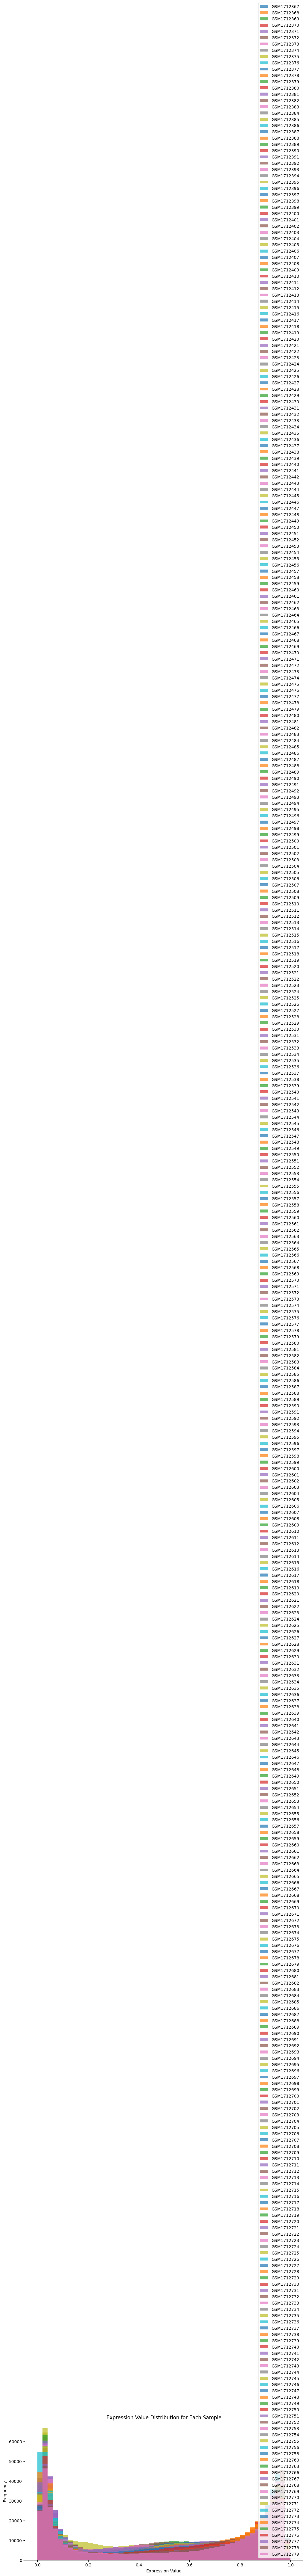

In [11]:
## Distribution of Expression Values (Histogram for each sample)
# Select columns containing gene expression (assume they are from column 2 onward)
expression_data = raw_dataset.iloc[:, 1:]

# Histogram of expression distribution for each sample
expression_data.plot(kind='hist', bins=50, alpha=0.7, figsize=(12, 6))
plt.title('Expression Value Distribution for Each Sample')
plt.xlabel('Expression Value')
plt.ylabel('Frequency')
plt.show()

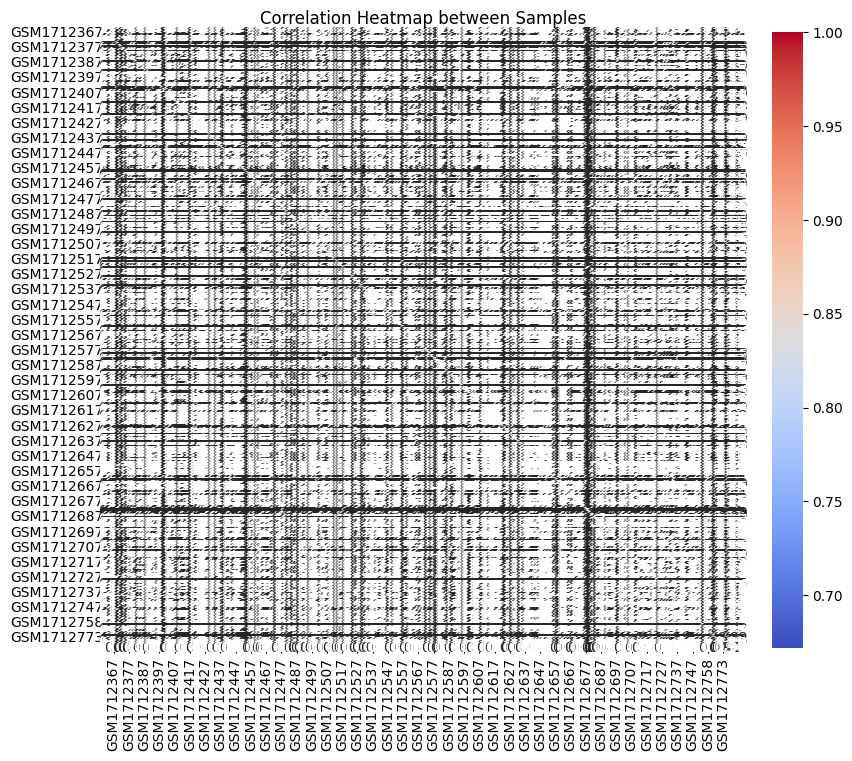

In [12]:
## Heatmap of Correlation between Samples
# Calculate the correlation matrix between the samples
correlation_matrix = expression_data.corr()

# Display the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap between Samples')
plt.show()

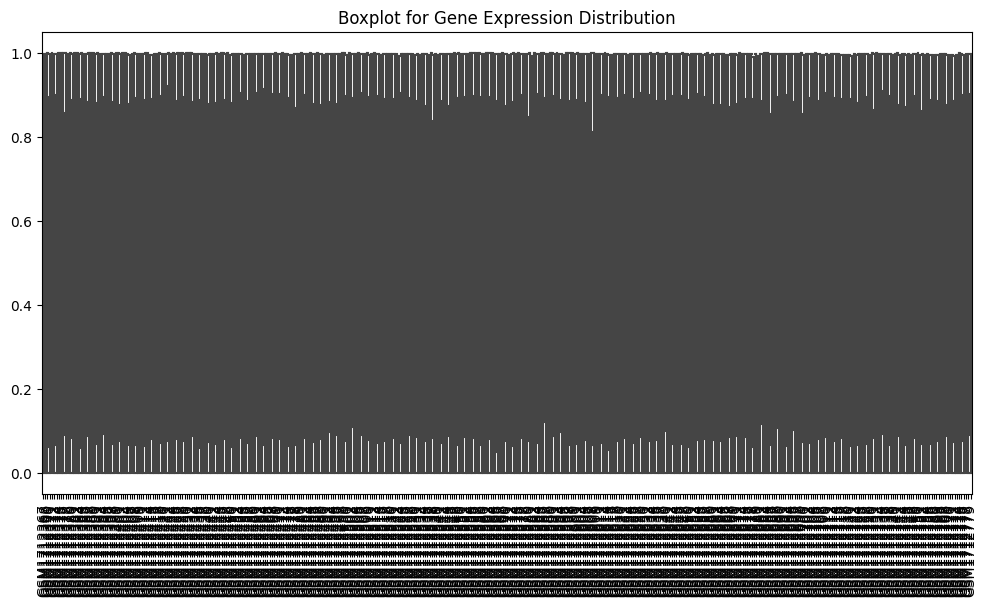

In [13]:
## Boxplot for Gene Expression Distribution Across Samples
# Boxplot to visualize the distribution across samples
plt.figure(figsize=(12, 6))
sns.boxplot(data=expression_data)
plt.title('Boxplot for Gene Expression Distribution')
plt.xticks(rotation=90)
plt.show()

Cercare di capire che sono le righe e le colonne bene e scriverlo molto bene.


## References
- **Dataset link and information**: [GSE69914 on GEO](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=gse69914)
- **Silenced or Active Regions**: Ehrlich, M. (2002). "DNA methylation in cancer: too much, but also too little." Oncogene, 21(35), 5400–5413.
